In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc

In [28]:
df=pd.read_csv('playsheet_dataset.csv')
df

,Outlook,Temp,Humidity,Windy,Play
0,Rainy,Hot,High,f,no
1,Rainy,Hot,High,t,no
2,Overcast,Hot,High,f,yes
3,Sunny,Mild,High,f,yes
4,Sunny,Cool,Normal,f,yes
5,Sunny,Cool,Normal,t,no
6,Overcast,Cool,Normal,t,yes
7,Rainy,Mild,High,f,no
8,Rainy,Cool,Normal,f,yes
9,Sunny,Mild,Normal,f,yes


In [29]:
Numerics=LabelEncoder()

In [30]:
X=df.drop('Play',axis='columns')
y=df['Play']


In [31]:
X['outlook_n']=Numerics.fit_transform(X['Outlook'])
X['Temp_n']=Numerics.fit_transform(X['Temp'])
X['Humidity_n']=Numerics.fit_transform(X['Humidity'])
X['windy_n']=Numerics.fit_transform(X['Windy'])
y=Numerics.fit_transform(y)

In [32]:
X=X.drop(['Outlook','Temp','Humidity','Windy'],axis='columns')
X

,outlook_n,Temp_n,Humidity_n,windy_n
0,1,1,0,0
1,1,1,0,1
2,0,1,0,0
3,2,2,0,0
4,2,0,1,0
5,2,0,1,1
6,0,0,1,1
7,1,2,0,0
8,1,0,1,0
9,2,2,1,0


In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [34]:
Classifier=GaussianNB()
Classifier.fit(X_train,y_train)

GaussianNB()

In [35]:
predictions=Classifier.predict(X_test)

In [36]:
predictions

array([1, 1, 1])

In [37]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,confusion_matrix

In [38]:
print("Accuracy : ",accuracy_score(predictions,y_test))

Accuracy :  0.6666666666666666


In [39]:
print("Precision : ",precision_score(predictions,y_test))

Precision :  1.0


In [40]:
print("Recall : ",recall_score(predictions,y_test))

Recall :  0.6666666666666666


In [41]:
print("F1_Score : ",f1_score(predictions,y_test))

F1_Score :  0.8


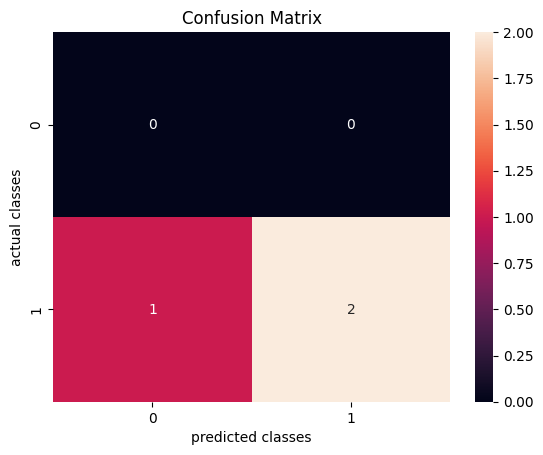

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
con=confusion_matrix(predictions,y_test)
sns.heatmap(con,annot=True)
plt.title("Confusion Matrix")
plt.xlabel("predicted classes")
plt.ylabel("actual classes")
plt.show()

In [43]:
probs = Classifier.predict_proba(X_test)
preds = probs[:,1]

In [44]:
fpr, tpr, thresholds = roc_curve(y_test, preds)

In [45]:
roc_auc = auc(fpr, tpr)

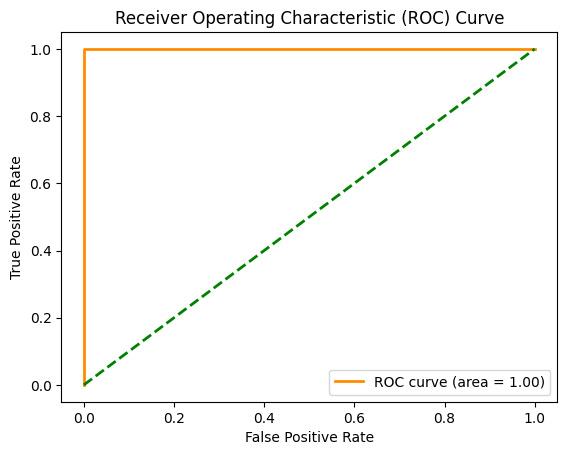

In [53]:
fpr,tpr,_=roc_curve(y_test,preds)
plt.plot(fpr,tpr,color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()